<a href="https://colab.research.google.com/github/firaz-thakur/SEOUL-BIKE-SHARING-DEMAND-PREDICTION/blob/main/Supervised_ML_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title :** **Bike Sharing Demand Prediction**



#**Problem Description :**

##Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it reduces waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

##Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes using the values in the other columns.With the of historical datas,we should be able to estimate the bike count required at each hour.

#**Data Description :**

##The dataset contains weather information such as Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall, the number of bikes rented per hour and date information.

#  **Attribute Information :**

* ## Rented Bike count - Count of bikes rented at each hour

* ## Seasons - Winter, Spring, Summer, Autumn
* ## Temperature-Temperature in Celsius
* ## Dew point temperature - Celsius
* ## Solar radiation - MJ/m2
* ## Date : year-month-day

* ## Hour - Hour of he day

* ## Humidity - %

* ## Windspeed - m/s

* ## Visibility - 10m


* ## Rainfall - mm
* ## Snowfall - cm




* ## Holiday - Holiday/No holiday

* ## Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


#**Approach to our Business Problem :**



1.   ## Data Analysis
2.   ## Feature Engineering


3.   ## Feature Selection
4.   ## Model Building

5.   ## Model Deployment


6.   ## Conclusion 











#**Importing all the libraries that are required for Analysis :**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings("ignore")


#**Downloading the Data :**

In [2]:
# Mounting Google Drive: 
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Creating Path for Data:
data = pd.read_csv("/content/drive/MyDrive/Data Science (Alma Better)/Machine learning (Module 4)/Linear Regression/CAPSTONE PROJ - LINEAR REGRESSION/SeoulBikeData.csv", encoding="latin1")
df = pd.DataFrame(data)

In [5]:
# Checking the Loaded Data :
# First 5 Rows :
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Last 5 Rows :
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Some more basic information about the data :
df.shape
print (f'The Total numbers of Rows and Columns are {df.shape} ')

The Total numbers of Rows and Columns are (8760, 14) 


In [8]:
# Know the total number of columns :
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
# Summary of the Dataset :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# Statistical description of the data set :
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [11]:
# Getting the unique values :
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

#**Pre-Processing the DataSet :**

## **Missing Values :**
* ## Why do we need to handle missing values ? 
#### Since, real world data has lot of missing values in it. The casue of missing values can be data corruption or missing information.Handling of the missing values is more important as many machine algorithm does not support missing values and our model can fail or mislead us.
#### So,our first priority is to deal with this missing values.




In [12]:
# We will sort the column first on the basis of missing data :
missing_data = df.isnull().sum()

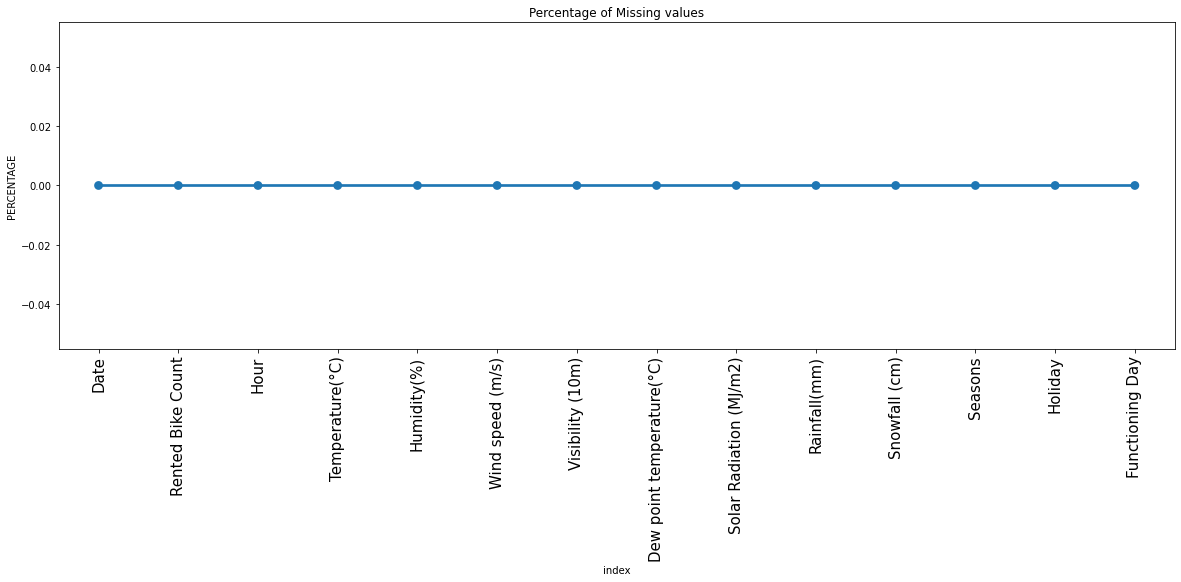

In [13]:
# Plotting a graph just to represent it clearly :
missing_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(20,6))
ax = sns.pointplot('index',0,data=missing_data)
plt.xticks(rotation =90,fontsize =15)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

 ## In the graph it is clearly shown that there is no Null values present in the data set.


## **Duplicate Values :**
* ## Why do we need to remove duplicate values ?
#### Duplicate values are caused due to the error of data collection or during data entry. By removing the duplication from the data set we will refine the data and make our model more sustainable.








In [14]:
# Checking Duplicate Values :
len(df[df.duplicated()])

0

 ## Since, there is no duplicate value in our data set.

## ***Renaming the columns name :***
* ## Why do we need to rename the coulmn name?
#### We rename the column name just to make it more readable in the data set for better understanding.




In [15]:
# Renaming the Columns names and then checking the updated data set :
df = df.rename(columns={'Rented Bike Count': 'Bike_count', 'Hour': 'Hour','Temperature(°C)': 'Temp', 'Humidity(%)': 'Humidity', 
                   'Wind speed (m/s)': 'Wind','Visibility (10m)': 'Visibility', 'Dew point temperature(°C)': 'Dew_temp',
                   'Solar Radiation (MJ/m2)': 'Sunlight', 'Rainfall(mm)': 'Rain',
                   'Snowfall (cm)': 'Snow','Seasons': 'Season', 'Holiday': 'Holiday', 'Functioning Day': 'Functioning_day'})

In [16]:
# Checking the updated df :
df.head()

,Date,Bike_count,Hour,Temp,Humidity,Wind,Visibility,Dew_temp,Sunlight,Rain,Snow,Season,Holiday,Functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## **Extracting Date, Month, Year from Date column :**
#### We are extracting some extra columns to get more meaningful insights.


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

# Computing day :
df['Day']=df['Date'].dt.day
# Computing month :            
df['Month']=df['Date'].dt.month    
# Computing year :     
df['Year']=df['Date'].dt.year        

# Dropping of column Date :
df.drop(columns=["Date"],inplace=True)

In [18]:
# It always a good practice whatever code u execute, print and check it :
df.head()

,Bike_count,Hour,Temp,Humidity,Wind,Visibility,Dew_temp,Sunlight,Rain,Snow,Season,Holiday,Functioning_day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


# **Exploratory Data Analysis and Visualization :**
* ## Why do we perform EDA?
 
 #### An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.



In [19]:
# Analyzing some patterns between dependent variables and independent variables.
# Since, our dependent variable is "Bike count".So we need to analysis this column with the other columns by using some visualisation plot.

[Text(0.5, 1.0, 'Count of Rented bikes according to Months')]

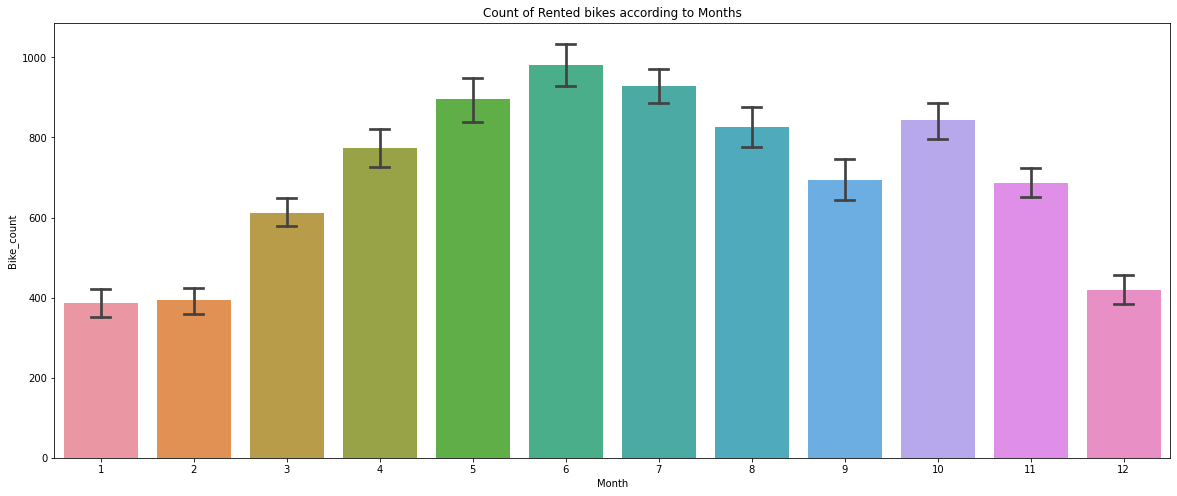

In [20]:
# Months v/s Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Month',y='Bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Months')

**Observations :** 
 
 from the bar plot graph we can clearly say :-
*  The highest months during which the count of rented bike is most is 6 and 7
 (i.e. june and july)
* The count of rented bikes is least during the starting of the month and end of the month. (i.e. january , february and december)  



[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

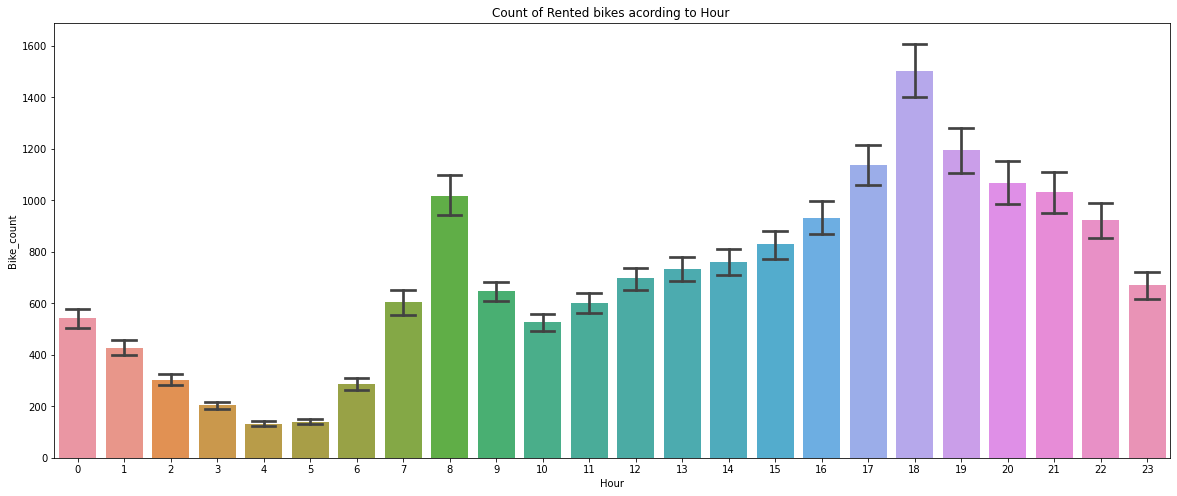

In [21]:
# Hours v/s Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Bike_count',ax=ax,capsize=.5)
ax.set(title='Count of Rented bikes acording to Hour ')

**Observations :**


* The highest number of count of rented bikes are at 8 am and 6 pm. This timings are considered as peak timings. 

* From 6 - 9 pm the count of rented bikes are more as compared to any other timings of the day.









[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

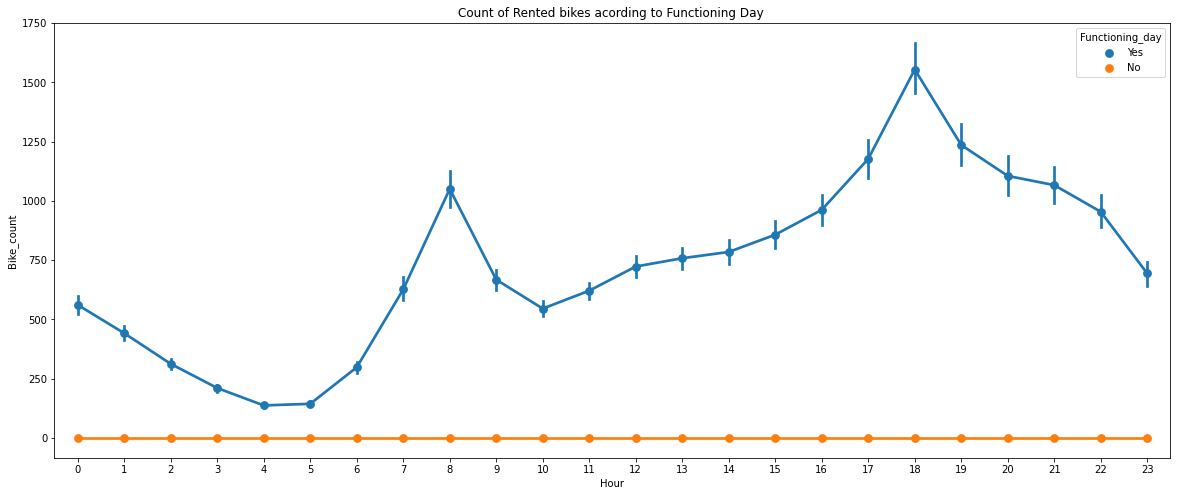

In [22]:
# Functioning_day v/s Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Bike_count',hue='Functioning_day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

**Observations :**

*  From the graph it has been clear that the count of rented bikes is '0' on non-working day , only on the working days rented bikes had been hired.



[Text(0.5, 1.0, 'Count of Rented bikes acording to Season ')]

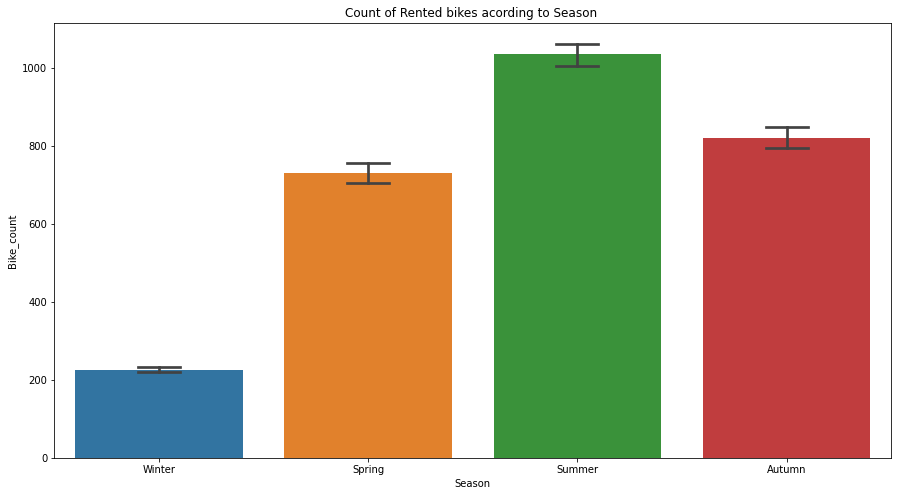

In [23]:
# Season v/s Bike_count :
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Season',y='Bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Season ')

**Observations :**

*   Summer and Autumn are the two highest count of rented bikes compared to other sessons of the year.



[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

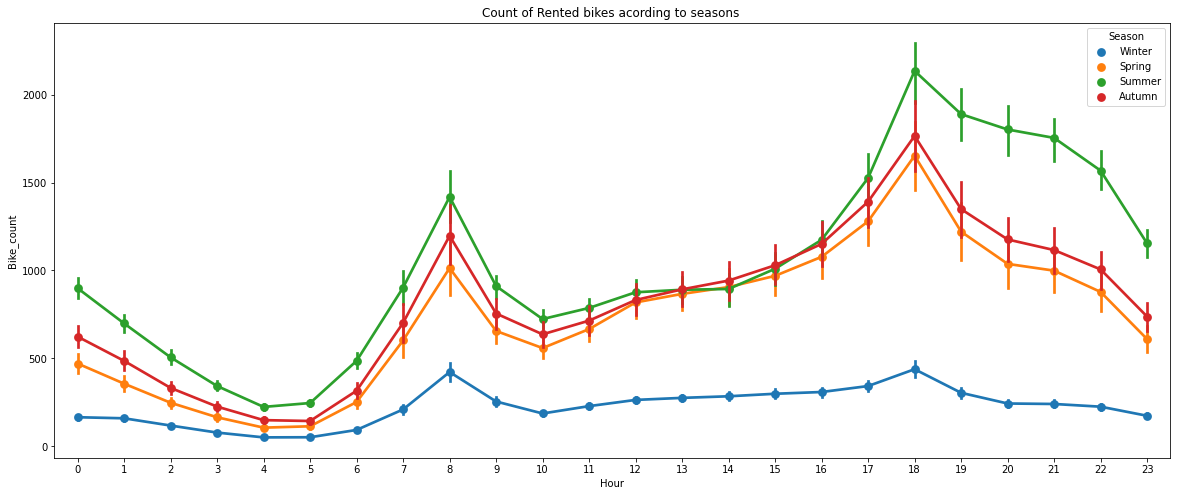

In [24]:
# Hour v/s Different types of seasons v/s the bike counts :
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Bike_count',hue='Season',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

**Observations :**

* Which ever be the sesson the peak hours of the rented bikes remains the same i.e. 8 am and 6 pm throught the 365 days.

*   Summer sesson being the highest number of count of rented bikes while winter being the lowest, snowfall can be the major reason for the decrease in the number of rented bikes during winter.





Text(0.5, 0, 'Snow')

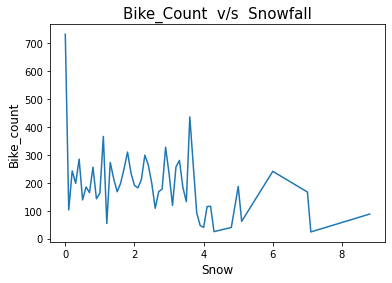

In [25]:
''' Finding out whether snowfall can be the major reason for decrease in count of rented bikes during winter.'''
# Analyzing the relationship between "Bike_Count" and "Snowfall"
df.groupby('Snow').mean()['Bike_count'].plot()
plt.title("Bike_Count  v/s  Snowfall",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Snow',fontsize=12)

**Observations :**

*   Although the count of rented bikes in winter is less when compared to other wheathers but as soon as the snowfall reaches beyond 4cm there has been an drastic drop in the count of rented bikes.

*   From this we can easily predict that snowfall plays a major role in the count of rented bikes .





Text(0.5, 0, 'Rain')

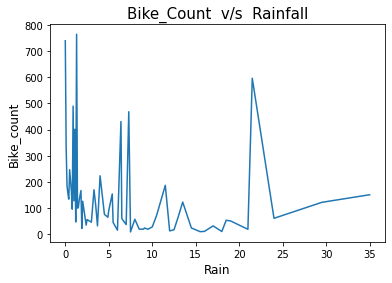

In [26]:
''' Checking whether increase in the rainfall can decrease the count of rented bikes. '''
# Analyzing the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rain').mean()['Bike_count'].plot()
plt.title("Bike_Count  v/s  Rainfall",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Rain',fontsize=12)

**Observations :**

* We can see from the above graph that even if it rains heavily the demand of the rent bikes is not decreasing drastically,for example even there is a drop in rented bikes between 10-15 mm rainfall but at 20 mm of rain there is an big hike again for rented bikes.

* So we can conclude that rainfall does not affect the number of the rented bikes much.





Text(0.5, 0, 'Wind')

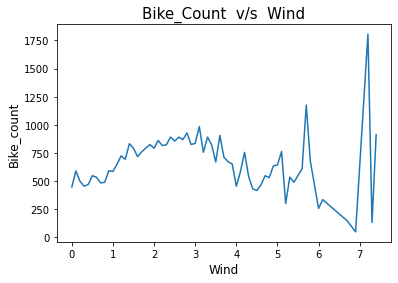

In [27]:
# Analyzing the relationship between "Bike_Count" and "Wind" 
df.groupby('Wind').mean()['Bike_count'].plot()
plt.title("Bike_Count  v/s  Wind",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Wind',fontsize=12)

**Observations :**

*  We can see from the above graph that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

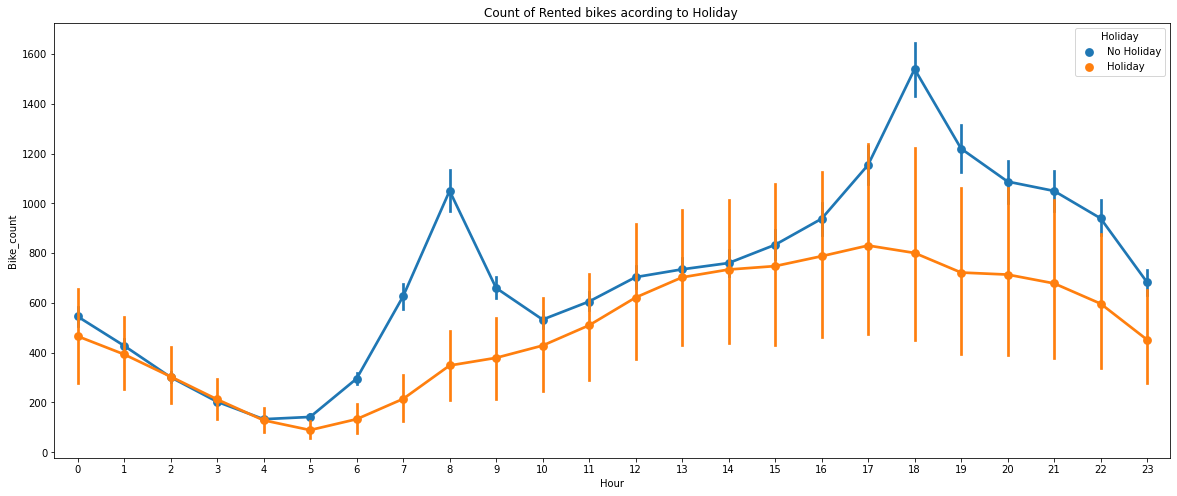

In [28]:
# Hour v/s bike counts v/s Holiday :
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Bike_count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

**Observations :**

*   Plot shows that in holiday, people uses the rented bike.

*   From 2pm-8pm the usage of the rented bikes is the highest.







Text(0.5, 0, 'temp')

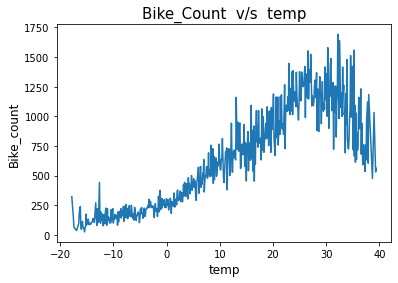

In [29]:
# Analyzing the relationship between "Bike_Count" and "Temperature" 
df.groupby('Temp').mean()['Bike_count'].plot()
plt.title("Bike_Count  v/s  temp",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('temp',fontsize=12)

**Observations :**

*   People like to ride bikes when it is pretty hot around 25°C in average, due to which the count of rented bikes is more neary this temperature.



# **Let's Do Distribution Checking :**

* ### Before proceeding with the distribution check ,let's first split the data into 2 lists (i.e. numericals and categoricals) for better understanding.




# Analyzing Numerical Data :

* ## What is Numerical data?
### Data which is expressed in numbers rather than natural language processing description. numerical data differentiates itself from other numbers in the form of data types (i.e. float64 and int64) with its ability to carry out arithmetic operations with these numbers.


In [30]:
# List of numerical variables :
numerical_features=[col for col in df.columns if df[col].dtype!='O']


In [31]:
# Separate dataframe for numerical features :
num_df=df[numerical_features]
num_df.head()

,Bike_count,Hour,Temp,Humidity,Wind,Visibility,Dew_temp,Sunlight,Rain,Snow,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,2017


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bike_count       8760 non-null   int64  
 1   Hour             8760 non-null   int64  
 2   Temp             8760 non-null   float64
 3   Humidity         8760 non-null   int64  
 4   Wind             8760 non-null   float64
 5   Visibility       8760 non-null   int64  
 6   Dew_temp         8760 non-null   float64
 7   Sunlight         8760 non-null   float64
 8   Rain             8760 non-null   float64
 9   Snow             8760 non-null   float64
 10  Season           8760 non-null   object 
 11  Holiday          8760 non-null   object 
 12  Functioning_day  8760 non-null   object 
 13  Day              8760 non-null   int64  
 14  Month            8760 non-null   int64  
 15  Year             8760 non-null   int64  
dtypes: float64(6), int64(7), object(3)
memory usage: 1.1+ MB


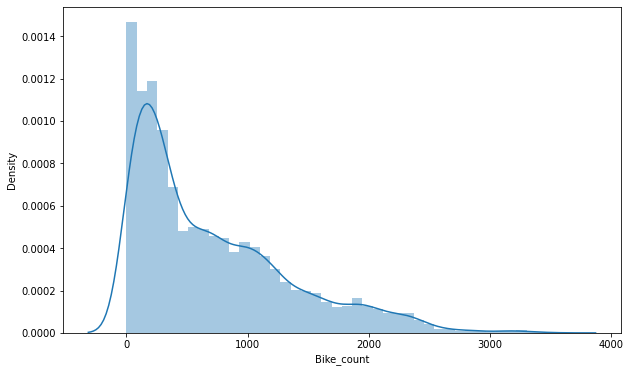

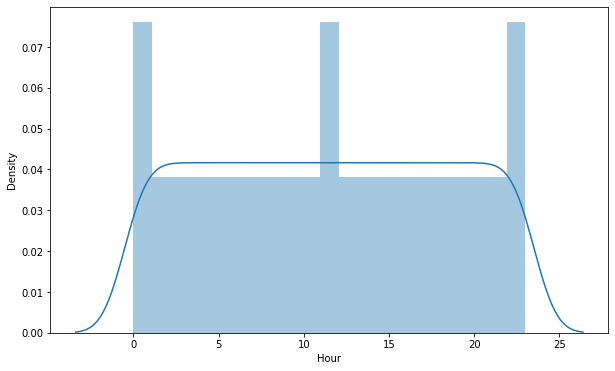

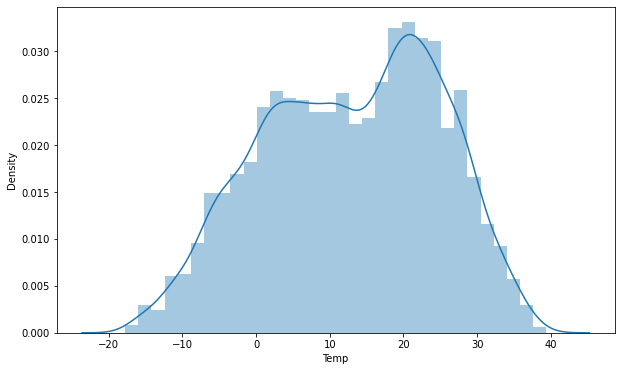

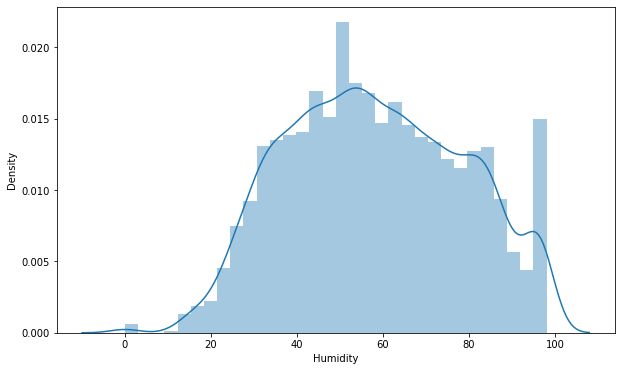

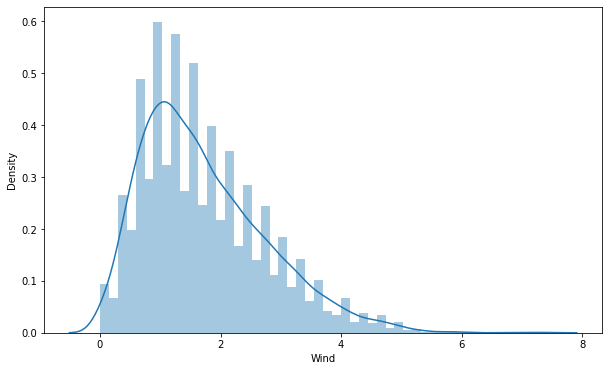

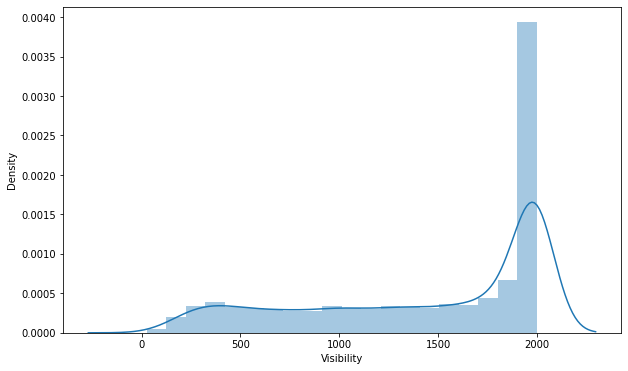

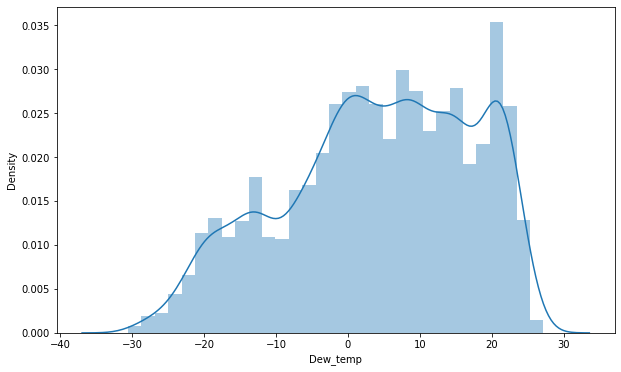

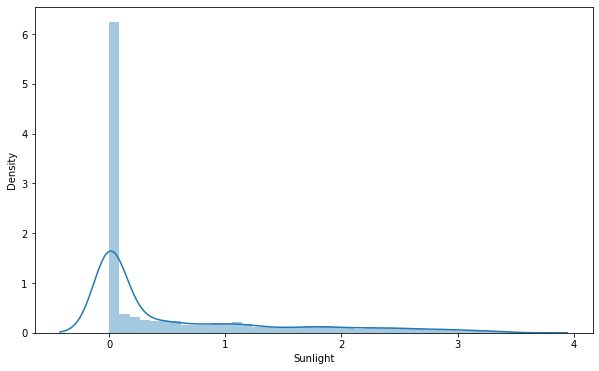

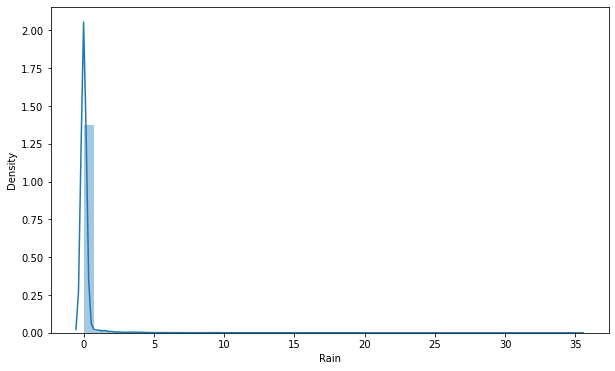

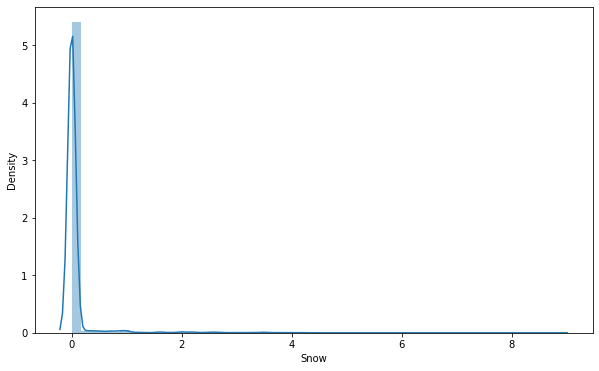

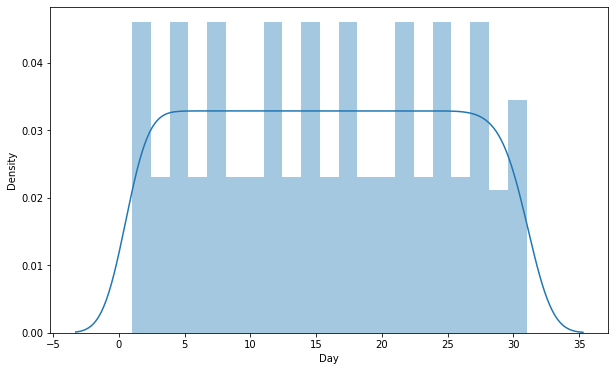

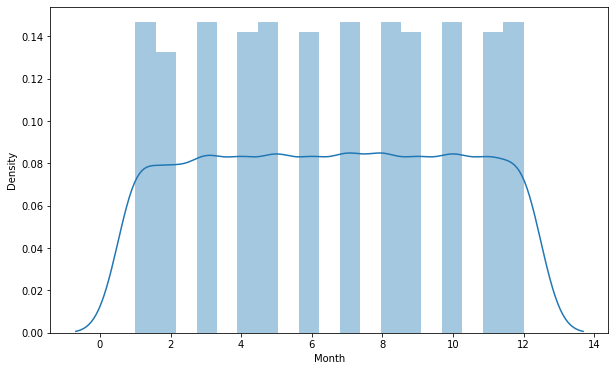

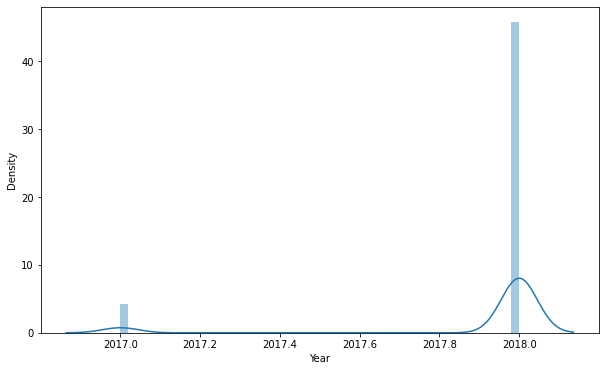

In [33]:
# Visualization displots to analyze the distribution of all numerical features :
for col in num_df :
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

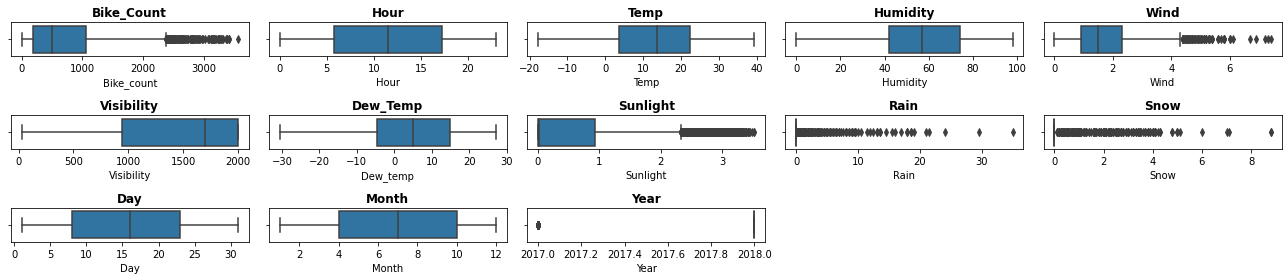

In [34]:
# Checking for Outliers :
plt.figure(figsize=(18,4))
for n,column in enumerate(num_df.describe().columns):
  plt.subplot(3, 5, n+1)
  sns.boxplot(num_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [35]:
# Removing outliers by using IQR method :
q1, q3, median = df.Bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Bike_count'] = np.where(df['Bike_count'] > upper_limit, median,np.where(
                            df['Bike_count'] < lower_limit,median,df['Bike_count']))

In [36]:
# Removing Outliers by Capping :
for col in ['Wind','Sunlight','Rain','Snow']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

# Analyzing Categorical Data :

* ## What is Categorical data?
#### The data which takes a limited number of possible values and need not to be in numerical form, it can be textual in nature.
#### It includes data type such as object and other category.

In [37]:
# List of categorical variables :
categorical_features=[col for col in df.columns if df[col].dtype=='O']
# Separate dataframe for Categorical feature
cat_data=df[categorical_features]
cat_data.head()

,Season,Holiday,Functioning_day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


 # Changing Data type (D-Type) :

All machine learning models are some kind of mathematical model that need numbers to work with.
Since columns : Season, Holiday and Functioning_day are taken as a string by the python because the dtype of this columns are object.

To keep our analysis on right track, we need this string data to get converted into numerical data.

In [38]:
# List of categorical features :
categorical_features = [i for i in df.columns if i not in df.describe().columns]
print(f"This are the categorical columns: {categorical_features}" )

This are the categorical columns: ['Season', 'Holiday', 'Functioning_day']


In [39]:
# Checking unique values with their count in categorical features :
for col in categorical_features:
  print(df[col].value_counts(),'\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Season, dtype: int64 

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Yes    8465
No      295
Name: Functioning_day, dtype: int64 



In [40]:
# Defining a label encoder for the above data :
encoder = {'holiday':{'Holiday':1, 'No Holiday':0},'functioning_day':{'Yes':1, 'No': 0},
          'timeshift': {'night':0, 'day':1, 'evening':2}}

In [41]:
# Label Encoding :
df = df.replace(encoder)

# One Hot Encoding :
df = pd.get_dummies(df)

In [42]:
df.head()

,Bike_count,Hour,Temp,Humidity,Wind,Visibility,Dew_temp,Sunlight,Rain,Snow,...,Month,Year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_day_No,Functioning_day_Yes
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1


In [43]:
# Checking the Dtype :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bike_count           8760 non-null   float64
 1   Hour                 8760 non-null   int64  
 2   Temp                 8760 non-null   float64
 3   Humidity             8760 non-null   int64  
 4   Wind                 8760 non-null   float64
 5   Visibility           8760 non-null   int64  
 6   Dew_temp             8760 non-null   float64
 7   Sunlight             8760 non-null   float64
 8   Rain                 8760 non-null   float64
 9   Snow                 8760 non-null   float64
 10  Day                  8760 non-null   int64  
 11  Month                8760 non-null   int64  
 12  Year                 8760 non-null   int64  
 13  Season_Autumn        8760 non-null   uint8  
 14  Season_Spring        8760 non-null   uint8  
 15  Season_Summer        8760 non-null   u

# **Finding out independent and dependent variables :**

## What is Independent variables ?

* ### An independent variable is exactly what it sounds like, a variable that stands alone and isn't changed by the other variables you are trying to measure. It tries to explain the value or effect of the output variable (dependent variable) by creating a relationship between an independent and dependent variable.

* ###  For example, in a plant growth study, the independent variables might be soil moisture (continuous) and type of fertilizer (categorical). 






In [44]:
# Finding out independent variables :
independent_variables = [i for i in df.columns if i not in ['Bike_count']]

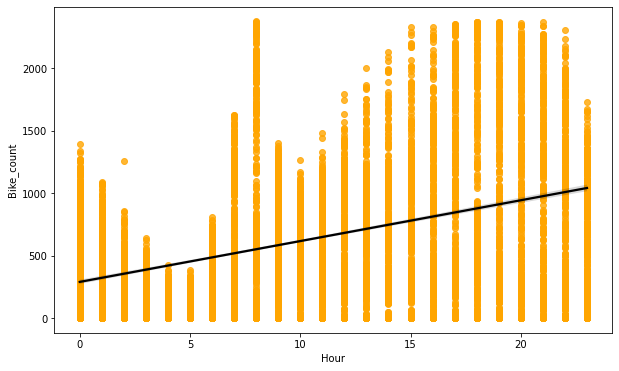

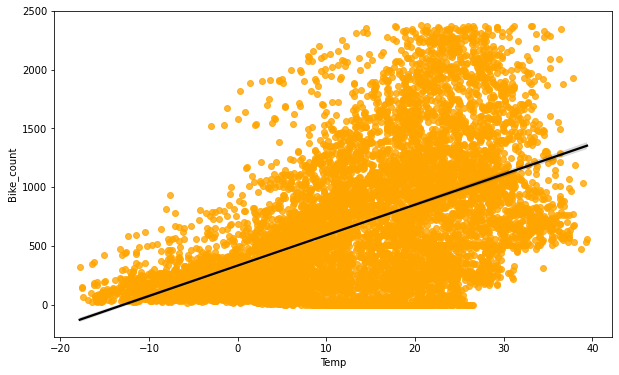

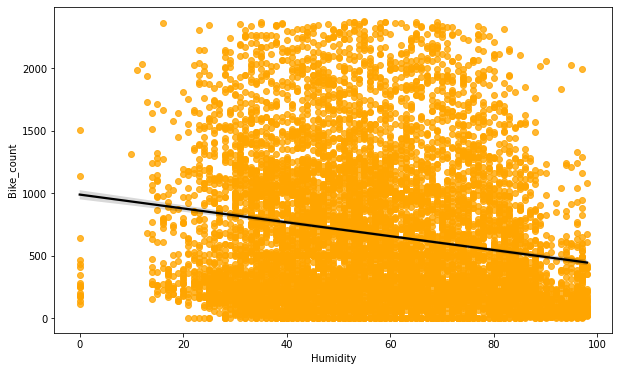

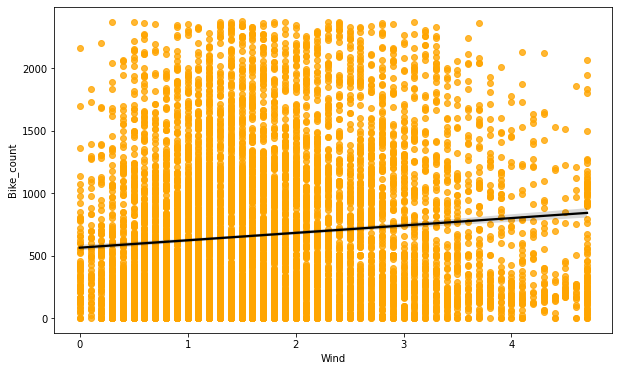

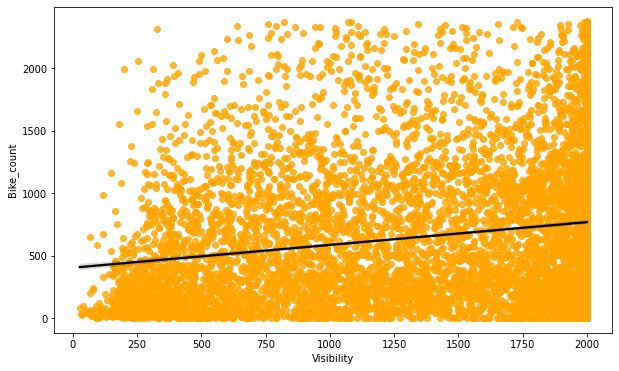

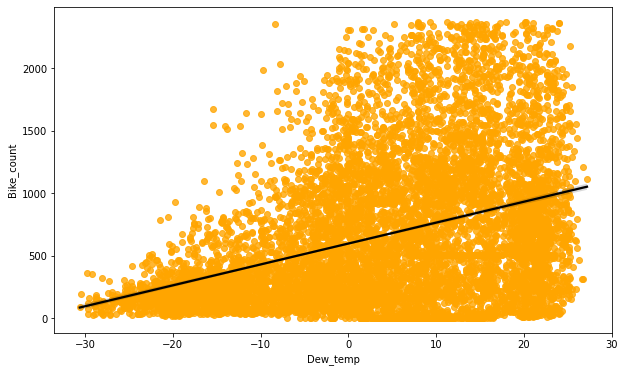

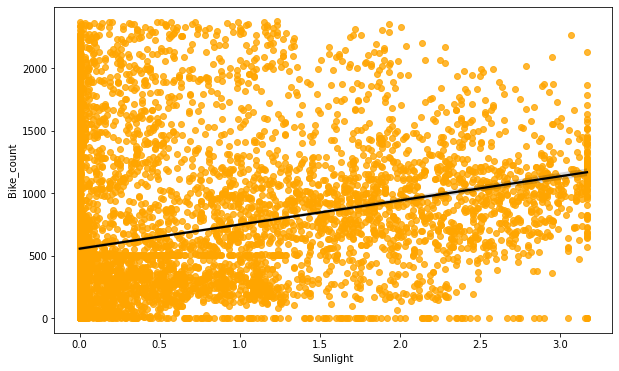

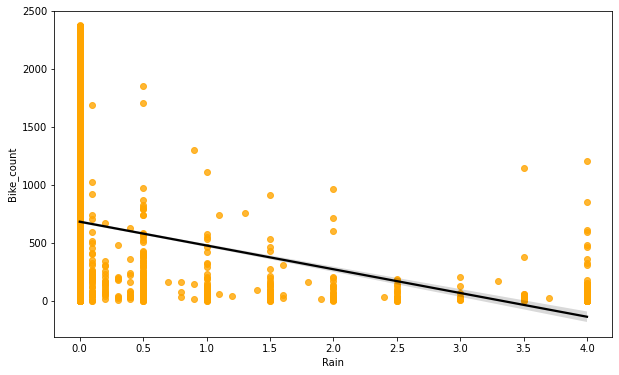

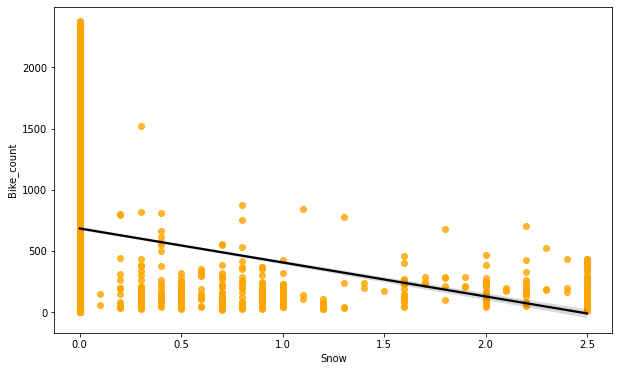

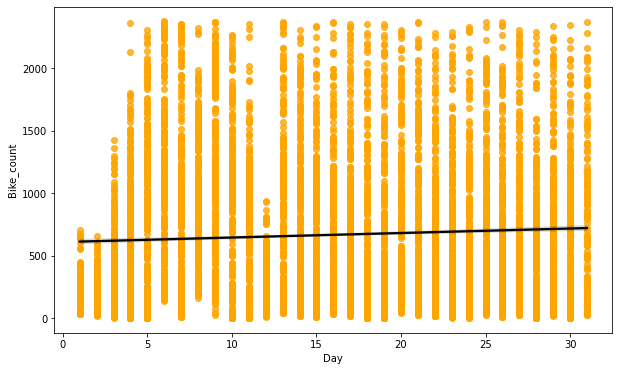

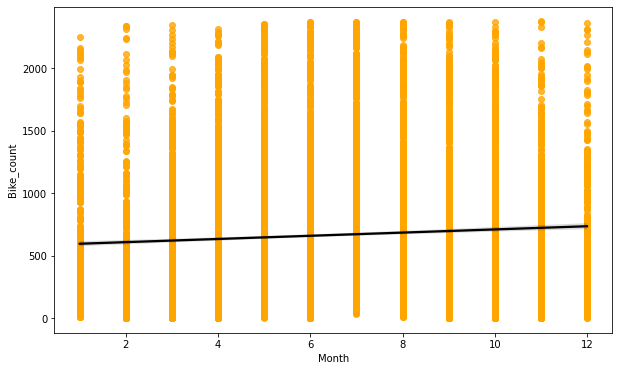

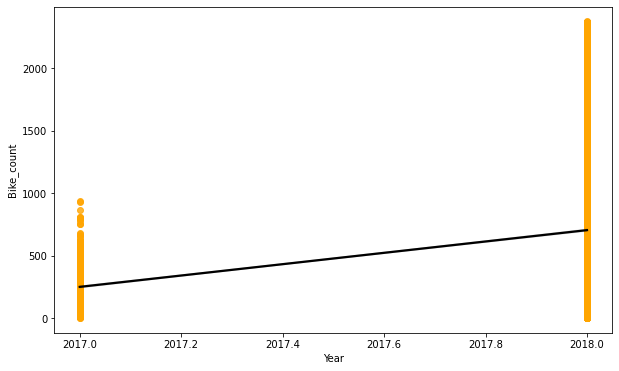

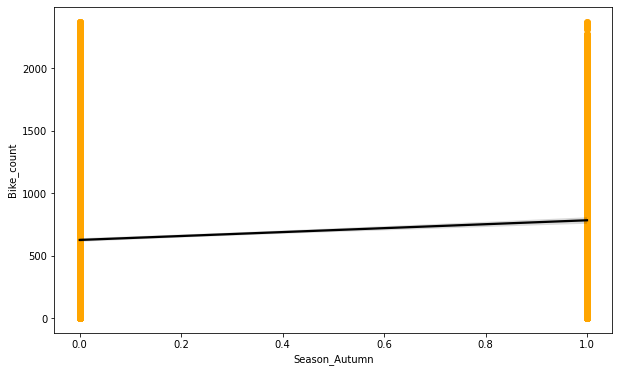

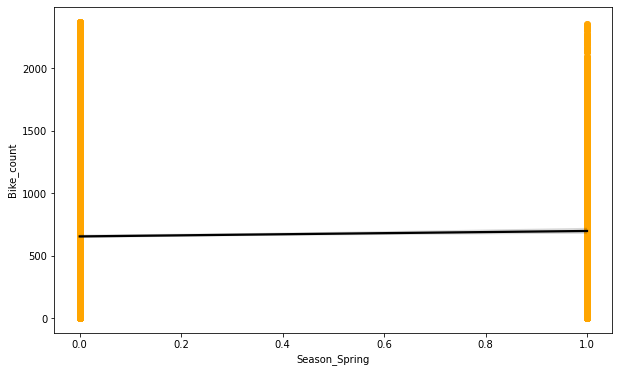

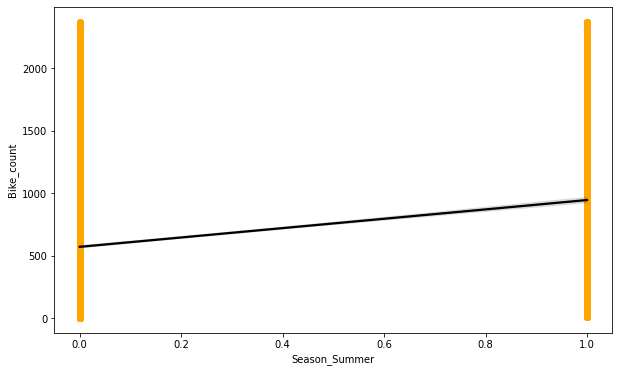

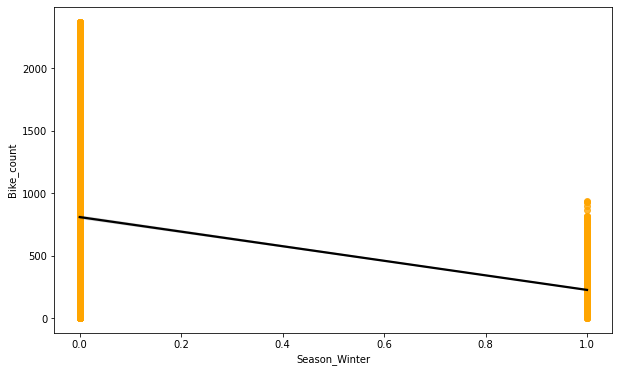

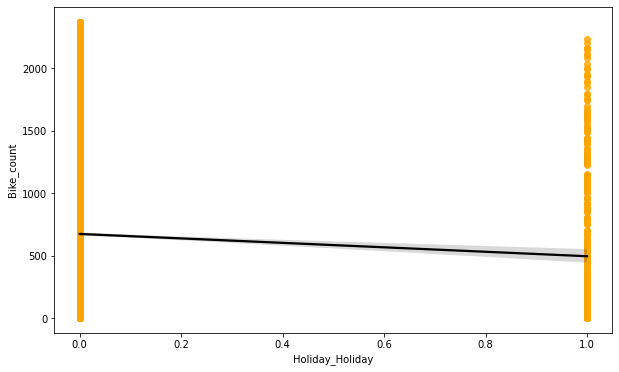

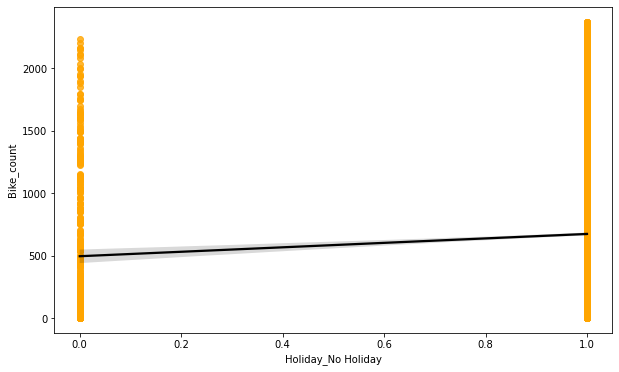

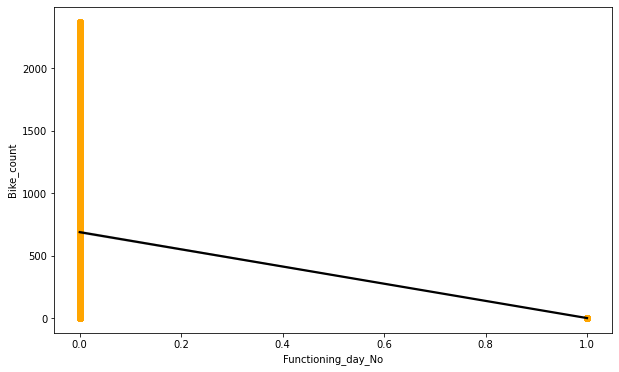

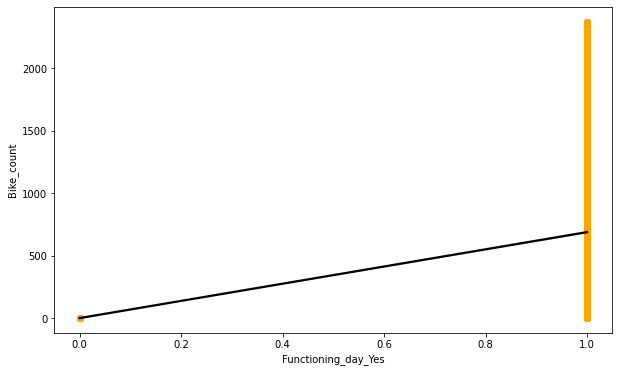

In [45]:
# Finding the relationship between independent and dependent variables through Regressions plot :
for col in independent_variables :
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Bike_count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

## What is Dependent variables ?

*  The dependent variable (DV) is what you want to use the model to explain or predict. The values of this variable depend on other variables. It is the outcome that you're studying. It's also known as the response variable, outcome variable, and left-hand variable.
* For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got the night before you took the test, or even how hungry you were when you took it.




In [46]:
# Since, the column Bike_count contaians the values which we need to predict.
# therefore, DV = Bike_count 

In [47]:
# Checking the skewness of the dependent variable :
print(f'Skewness of original data : {df.Bike_count.skew()}')

print(f'Skewness after transformation : {np.sqrt(df.Bike_count).skew()}')

Skewness of original data : 0.983470199089409
Skewness after transformation : 0.153123685071092


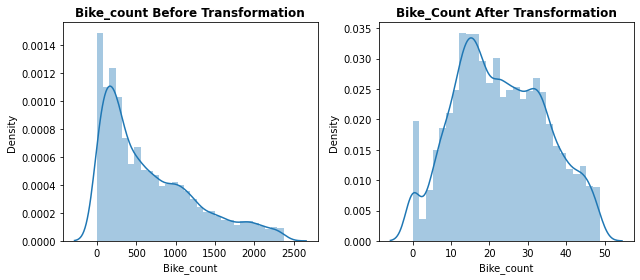

In [48]:
# Since Sqrt transformation gives skewness between -0.5 and 0.5 indicates that, the distribution is fairly symmetrical we will use it :
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['Bike_count']).set_title('Bike_count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Bike_count'])).set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()

# **Removing Multi-colinearity :**

# What is Variance Inflation Factor (VIF) ?

### A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model



In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [50]:
numerical_variables = [i for i in num_df.columns if i not in ['Bike_count']]
calc_vif(df[numerical_variables])

,variables,VIF
0,Hour,4.468888
1,Temp,191.061842
2,Humidity,192.357626
3,Wind,4.973915
4,Visibility,10.713520
5,Dew_temp,128.609075
6,Sunlight,2.924898
7,Rain,1.221217
8,Snow,1.181730
9,Day,4.430296


## Since Summer and Winter can also be classified on the basis of temperature and we already have that feature present. Even if we drop these features the useful information will not be lost. So lets drop them.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

df_variables = [i for i in df.columns if i not in ['Bike_count']]
calc_vif(df[df_variables])

,variables,VIF
0,Hour,1.216137
1,Temp,90.856714
2,Humidity,21.203592
3,Wind,1.314368
4,Visibility,1.738413
5,Dew_temp,118.789721
6,Sunlight,2.059128
7,Rain,1.180105
8,Snow,1.180156
9,Day,1.100169


In [52]:
# Checking the corelations between the variables :
# Checking Linearity of the new dataset

In [53]:
# model building 
# Prerequisites